## Imports and Data Load

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing statcast data from pybaseball package.

In [2]:
from pybaseball import statcast

Creating Pandas dataframe with statcast data for month of July in 2019 MLB season.

In [3]:
data = statcast(start_dt='2019-07-01', end_dt='2019-07-31')

This is a large query, it may take a moment to complete
Completed sub-query from 2019-07-01 to 2019-07-06
Completed sub-query from 2019-07-07 to 2019-07-12
Completed sub-query from 2019-07-13 to 2019-07-18
Completed sub-query from 2019-07-19 to 2019-07-24
Completed sub-query from 2019-07-25 to 2019-07-30
Completed sub-query from 2019-07-31 to 2019-07-31


## Data Definition

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110615 entries, 0 to 110614
Data columns (total 90 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   index                            110615 non-null  int64         
 1   pitch_type                       110314 non-null  object        
 2   game_date                        110615 non-null  datetime64[ns]
 3   release_speed                    110327 non-null  float64       
 4   release_pos_x                    110323 non-null  float64       
 5   release_pos_z                    110323 non-null  float64       
 6   player_name                      110615 non-null  object        
 7   batter                           110615 non-null  float64       
 8   pitcher                          110615 non-null  float64       
 9   events                           28216 non-null   object        
 10  description                      110615 non-

In [45]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
index,1780,1840,1865,1934,1986,1999,2046,2138,2192,2205
pitch_type,SI,SL,SL,FF,FF,FF,FF,SI,FF,FF
game_date,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00,2019-07-31 00:00:00
release_speed,101.0,88.1,85.8,96.5,96.8,97.5,97.9,100.5,99.8,98.0
release_pos_x,0.56,0.55,0.39,0.72,0.5,0.62,0.58,0.57,0.62,0.63
...,...,...,...,...,...,...,...,...,...,...
post_home_score,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
post_bat_score,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
post_fld_score,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
if_fielding_alignment,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard


There are a number of depricated fields in the data with no associated values. These fields are old inputs from the MLB tracking system prior to Statcast. A number of values are also expected to have some null values given the nature of pitch level data. Not all pitches will result in a hit or will have runners on base.

In [5]:
#Dropping deprecated fields from old tracking system
data.drop(columns=['umpire', 'spin_dir', 'tfs_deprecated', 'break_angle_deprecated', 'spin_rate_deprecated', 
           'break_length_deprecated', 'tfs_zulu_deprecated'], inplace=True )

With pitch_type as our target value, and every pitch thrown should have a type, I'm interested in the null values for pitch_type.

In [17]:
data[data['pitch_type'].isnull()]

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
4057,1933,NaN,2019-07-31,NaN,NaN,NaN,"Norris, Daniel",592743.0,596057.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
7525,3943,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",640458.0,532077.0,field_out,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Standard,Standard
7526,4036,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",640458.0,532077.0,NaN,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Standard,Standard
7527,4172,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",640458.0,532077.0,NaN,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Standard,Standard
7528,4300,NaN,2019-07-30,NaN,NaN,NaN,"Osuna, Roberto",596019.0,532077.0,field_out,...,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,Infield shift,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100782,16113,NaN,2019-07-03,96.3,-1.58,5.31,"Webb, Jacob",547180.0,657097.0,NaN,...,9.0,2.0,2.0,9.0,2.0,9.0,2.0,9.0,Infield shift,Standard
102317,15603,NaN,2019-07-03,NaN,NaN,NaN,"Perdomo, Luis",607680.0,606131.0,hit_by_pitch,...,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,Standard,Standard
102466,14587,NaN,2019-07-03,NaN,NaN,NaN,"Quantrill, Cal",607680.0,615698.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
109972,21762,NaN,2019-07-01,NaN,NaN,NaN,"Allen, Logan",596103.0,663531.0,field_out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Strategic


In [7]:
data[data['pitch_type'].isnull()].groupby('game_date')['game_date'].count()

game_date
2019-07-01      2
2019-07-03      4
2019-07-04      4
2019-07-05      3
2019-07-06      5
2019-07-12      4
2019-07-13      2
2019-07-14      1
2019-07-15      1
2019-07-16      1
2019-07-17      4
2019-07-18      1
2019-07-19      1
2019-07-20      1
2019-07-21      3
2019-07-22      1
2019-07-23      3
2019-07-25      2
2019-07-26      1
2019-07-27      1
2019-07-30    255
2019-07-31      1
Name: game_date, dtype: int64

Looks like Statcast is prone to miss 1-4 pitches per day. Could be wild pitches outside of the capture zone, or the system isn't perfect and has an error rate. 7/30 appears to have had an entire game or two where the system did not work at all:

In [9]:
data['game_date'] = pd.to_datetime(data['game_date'])

In [10]:
July30 = data.loc[data['game_date'] == pd.to_datetime('2019-07-30')]
July30.loc[July30['pitch_type'].isnull()]['player_name'][''] .value_counts()

Bieber, Shane        108
Verlander, Justin    105
Harris, Will          19
Wittgren, Nick         8
Clippard, Tyler        8
Osuna, Roberto         6
Price, David           1
Name: player_name, dtype: int64

In [15]:
July30.loc[July30['pitch_type'].isnull()]['game_pk'].value_counts()

565369.0    254
565080.0      1
Name: game_pk, dtype: int64

The pitcher list of null values were mostly pitchers in a single game with ID = 565369. Only 1 pitch was not part of the apparent game without a working Statcast, and that is aligned with other daily values. I'm still curious about the other null values and want to check the description of the resultant pitches with missing pitch_type values.

In [19]:
data.loc[data['pitch_type'].isnull()]['description'].value_counts()

ball                       97
called_strike              56
foul                       56
hit_into_play              43
swinging_strike            38
swinging_strike_blocked     5
blocked_ball                4
foul_bunt                   1
hit_by_pitch                1
Name: description, dtype: int64

In [26]:
data['pitch_type'].isnull().sum() / len(data['pitch_type']) * 100

0.2721149934457352

Null values do not appear to be due to wild pitches given the called strikes and contacts (foul and hit_into_play). I think it's fair to say the Statcast tracking system is able to capture 99.7% of the pitch types, with a missed call rate of 0.3% based on above. I'll need to consider how to handle this later as removing a single pitch from an at bat won't accurately represent the sequence of pitches in the at bat. This won't be a problem if we take more of a macro approach to predicting pitches.

In [ ]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing[missing['count'] > 0].sort_values(by='count', ascending=False)

## Target Feature

In [43]:
#pd.concat([s1, s2], axis=1).reset_index()
pitch_counts = pd.concat([100 * data['pitch_type'].value_counts(normalize=True).round(3), data['pitch_type'].value_counts()], axis=1)
pitch_counts.columns = ['%', 'count']
pitch_counts

,%,count
FF,36.3,40020
SL,17.8,19667
CH,11.2,12332
FT,8.7,9646
CU,8.3,9160
SI,7.4,8173
FC,6.5,7153
KC,2.3,2586
FS,1.4,1497
KN,0.0,50


Fastballs (FF & FT) account for 45% of all pitches, plus sliders and changeups to capture the majority at 74%.

Curveball (CU)
Cutter (FC)
Eephus (EP)
Forkball (FO)
Four-Seam Fastball (FA)
Knuckleball (KN)
Knuckle-curve (KC)
Screwball (SC)
Sinker (SI)
Slider (SL)
Splitter (FS)
Two-Seam Fastball (FT)

In [120]:
data['pitch_type'].describe()

count     110314
unique        12
top           FF
freq       40020
Name: pitch_type, dtype: object

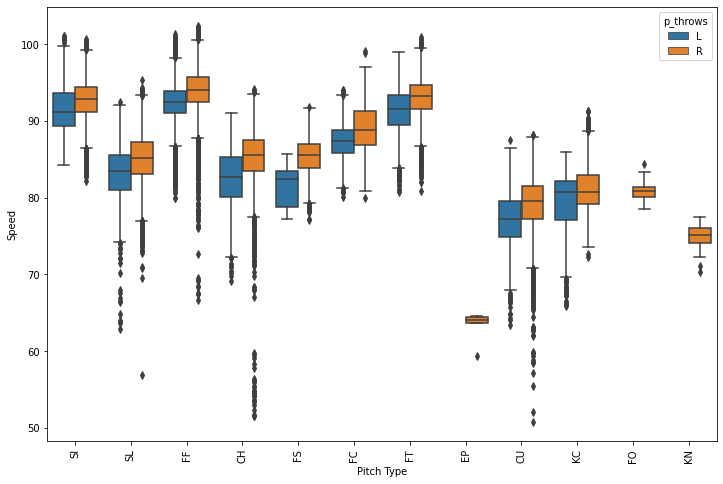

In [73]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='pitch_type', y='release_speed', hue='p_throws', data=data)
plt.xticks(rotation='vertical')
plt.ylabel('Speed')
plt.xlabel('Pitch Type');


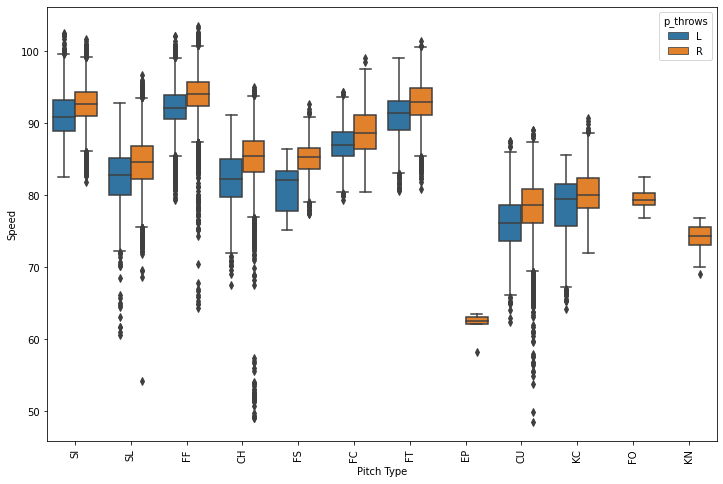

In [74]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='pitch_type', y='effective_speed', hue='p_throws', data=data)
plt.xticks(rotation='vertical')
plt.ylabel('Speed')
plt.xlabel('Pitch Type');

In [44]:
data[['pitch_type','release_speed']].nunique()

pitch_type        12
release_speed    416
dtype: int64

In [6]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing[missing['count'] > 0].sort_values(by='count', ascending=False)

,count,%
umpire,1477,100.000000
spin_dir,1477,100.000000
tfs_deprecated,1477,100.000000
break_angle_deprecated,1477,100.000000
spin_rate_deprecated,1477,100.000000
break_length_deprecated,1477,100.000000
tfs_zulu_deprecated,1477,100.000000
sv_id,1477,100.000000
on_3b,1321,89.438050
launch_speed_angle,1180,79.891672


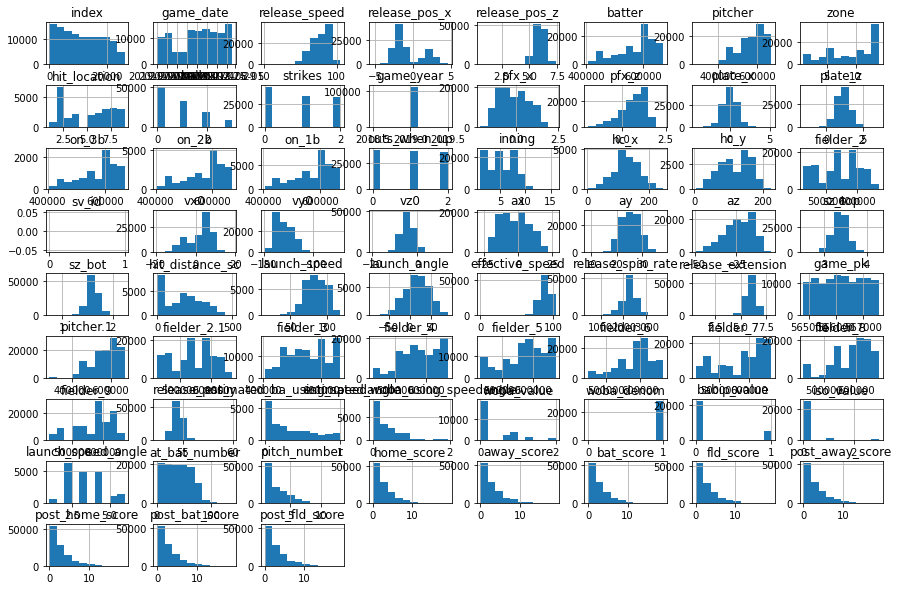

In [75]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=.5);

In [15]:
objects = data.select_dtypes('object')

In [24]:
for i in objects:
    print(objects[i].value_counts(),'\n')

FF    567
SL    273
FT    205
CH    126
CU    110
FC     76
SI     65
FS     33
KC     20
Name: pitch_type, dtype: int64 

Samardzija, Jeff        114
Mahle, Tyler            102
Williams, Trevor         95
Allen, Logan             83
Richard, Clayton         79
Flynn, Brian             76
Eshelman, Thomas         75
Houser, Adrian           75
Yarbrough, Ryan          61
Sparkman, Glenn          58
Alzolay, Adbert          57
Maton, Phil              56
Castro, Miguel           42
Stanek, Ryne             34
Brach, Brad              33
Wick, Rowan              31
Hernandez, David         30
Stock, Robert            28
Bowman, Matt             25
Stratton, Chris          25
Peralta, Wily            23
Stephenson, Robert       20
Kimbrel, Craig           19
Neverauskas, Dovydas     18
Phelps, David            16
Alvarado, José           16
Hader, Josh              16
Burnes, Corbin           15
Wingenter, Trey          15
Gaviglio, Sam            15
Roe, Chaz                15
Holland, 

## Summary

Sopme